This notebook is meant to analyze the .csv files produced at the end of training
by producing a series of plots.

In [1]:
# Imports
import os
import re
import csv
import imageio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Set the root path of the particle generator experiments folder
exp_root = "/media/hdd1/kai/particle_generator/experiments/"

In [3]:
# Set the dir of the particular experiment to be analyzed
exp_dir = "01-05-2020_12-32-49_ae_7500_epochs_LArCV_64_dataset/"

In [4]:
# Create the full path to the experiment
exp_path = os.path.join(exp_root, exp_dir)
print("Experiment path set as: \n{}".format(exp_path))

Experiment path set as: 
/media/hdd1/kai/particle_generator/experiments/01-05-2020_12-32-49_ae_7500_epochs_LArCV_64_dataset/


In [5]:
# Get the config csv
config_csv = exp_path + "config.csv"
config_df = pd.read_csv(config_csv, delimiter = ",")

In [6]:
# Get the name of the model in the config file
model = config_df[config_df['Unnamed: 0'].str.contains("model")==True]['0'].item()
model = str.upper(model)

In [7]:
# Get the name of the dataset used to train the model
dataset = int(config_df[config_df['Unnamed: 0'].str.contains("dataset")==True]['0'].item())

In [8]:
# Get the losses 
losses_csv = exp_path + "losses.csv"
losses_df = pd.read_csv(losses_csv, delimiter = ",")
losses = np.asarray(losses_df['ae_loss'])

In [9]:
# Get the training times
times_csv = exp_path + "times.csv"
times_df = pd.read_csv(times_csv, delimiter = ",")

In [10]:
# Get the number of training epochs
num_epochs = int(config_df[config_df['Unnamed: 0'].str.contains("epochs")==True]['0'].item())

In [11]:
# Compute average loss per epoch based based on loss array len
step = int(len(losses) / num_epochs)
new_losses = []
for i in range(0, len(losses), step):
    new_losses.append( sum(losses[i:i+step]) / step )
new_losses = np.asarray(new_losses)

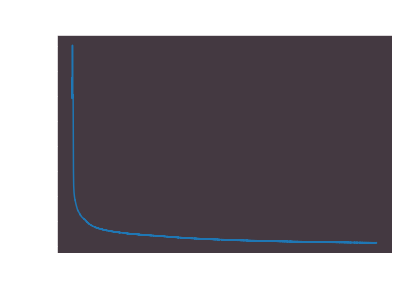

In [12]:
# Plot the losses against the number of epochs
fig, axes = plt.subplots(1,1)
fig.suptitle("Loss Values", color = "white")

label = "{} Model Trained for {} Epochs on {} Dataset".format(model, num_epochs, dataset)
axes.set_title(label, color="white", fontsize="small")
axes.set_xlabel("Epoch Number")
axes.set_ylabel("Loss Value")
axes.set_facecolor("#443941")

# Stylize
axes.spines['bottom'].set_color('white')
axes.spines['top'].set_color('white')
axes.spines['left'].set_color('white')
axes.spines['right'].set_color('white')
axes.xaxis.label.set_color('white')
axes.yaxis.label.set_color('white')
axes.tick_params(axis='x', colors='white')
axes.tick_params(axis='y', colors='white')

# Plot data
axes.plot(np.arange(0, num_epochs), new_losses)

# Generate and save image
save_file = "loss_values_{}_model_{}_epochs_{}_dataset.png".format(model, num_epochs, dataset)
plt.savefig(save_file, dpi=300, facecolor='#443941')

In [13]:
# Save an additional image to the experiment folder
plt.savefig(exp_path + save_file, dpi=300, facecolor='#443941')

<Figure size 432x288 with 0 Axes>